# Ejemplo 1.1 de las notas de Anguiano
**Autor:** Martínez Torres Marcos Alfonso, Facultad de Ingeniería, UNAM

Licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

## Ejemplo 1.1

Aproximar $f(t)=\cos\left(\frac{\pi}{2}t\right)$ con un polinomio que coincida en $\{-1,0,1\}$

### Solución
Se importan las bibliotecas de Python
* *numpy* : Permite crear y gestionar arreglos multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel que operan sobre estos arreglos. El sitio oficial es https://numpy.org/
* *matplotlib* : Permite crear visualizaciones estáticas, animadas e interactivas en 2D y 3D. El sitio oficial es https://matplotlib.org/


In [2]:
import numpy as np
import matplotlib.pyplot as plt

**NOTA**: Para convocar las funciones de una biblioteca en el código, abreviamos dicha función con el nombre que queramos.
En este caso convocamos a *numpy* como np y la función *pyplot* de *matplotlib* como plt

Se construye el arreglo *numpy*  de la función   " *t* " que va a estar dentro del intervalo $-1\leq t\leq 1$.

In [3]:
# Vector de numpy de la variable independiente pidiendo al usuario que ingrese el vector
t = np.linspace(-1, 1, 100)

**NOTA**: La función *np.linspace* de *numpy* es una herramienta útil para generar secuencias de números espaciados uniformemente dentro de un rango especificado.

Pedimos al usuario la cantidad de puntos que se quieren usar en la aproximación y validamos que esten en el intervalo de "*t*"

In [4]:
#Definir la cantidad de puntos a evaluar
n = int(input("Ingrese la cantidad de puntos a evaluar: "))

# Crear una lista para almacenar los puntos ingresados por el usuario
puntos = []

# Pedir al usuario que ingrese los puntos a evaluar
for i in range(n):
    punto = float(input(f"Ingrese el punto {i + 1}: "))
    # Verificar que el punto esté dentro del intervalo de t
    if -1 <= punto <= 1:
        puntos.append(punto)
    else:
        print(f"Error: El punto {punto} está fuera del intervalo [{-1}, {1}].")

Se construye la función original

In [5]:
# Vector de numpy con la evaluación de la función que se quiere aproximar
f = np.cos(np.pi/2*t)

**NOTA**: " *np.cos* " es la función coseno incluida en *numpy*, por que python base no la contiene, lo mismo pasa con " *np.pi* "

Graficamos la funcion original

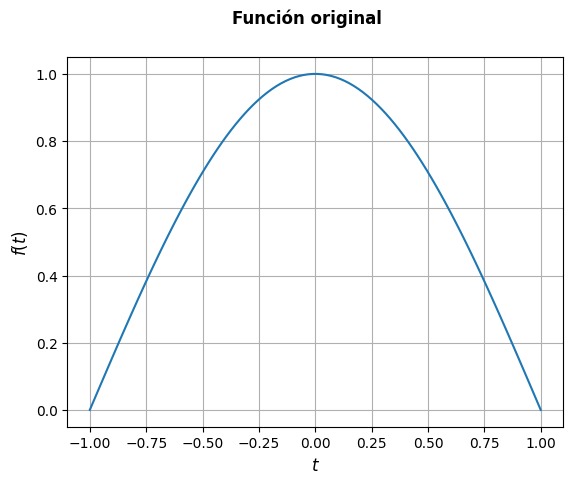

In [6]:
# Se crea la figura
fig = plt.figure()

# Se grafica el vector de la función con respecto al vector de la variable independiente
plt.plot(t, f)

# Se edita la figura
plt.xlabel('$t$',fontsize=12) # Se escribe la etiqueta del eje de la variable indpendiente en tamaño de letra 12
plt.ylabel('$f(t)$',fontsize=12) # Se escribe la etiqueta del eje de la función en tamaño de letra 12
plt.suptitle('Función original', weight='bold') # Se escribe el título de la gráfica 
plt.grid() # Se grafica la cuadrícula

# Se muestra la figura
plt.show()

Aproximaremos la función original con **n puntos** que esten en el intervalo de  $-1\leq t\leq 1$, para ello necesitaremos trabajar con un **polinomió de orden n-1**  
$$
f_a(t)=\sum_{k=0}^{n-1} a_kt^k=a_0+a_1t+a_2t^2+a_3t^3+...+a_{n-1}t^{n-1}
$$
para poder construir un **sistema algebraico cuadrado** que se pueda resolverse.<br><br>
**NOTA**: *Si se eligiera un polinomio de menor orden, se tendría un sistema algebraico sobredeterminado. Por el contrario, si se eligiera un polinomio de orden mayor, se tendría un sistema algebraico subdeterminado.*<br><br>
El sistema matricial se construye al evaluar la *función original* en los puntos solicitados $\{p_1,p_2,\ldots,p_n\}$ y hacerlos **coincidir** con la evaluación de la *función aproximada*

$$
\begin{align}
\cos\left(\frac{\pi}{2}p_1\right) && = && f_a(p_1) && = && a_0 &&+&& a_1 &&+&& a_2 &&+&&...&&+&& a_{n-1}\\
\vdots \\
\cos\left(\frac{\pi}{2}p_n\right) && = && f_a(p_n) && = && a_0 &&+&& a_1 &&+&& a_2 &&+&&...&&+&& a_{n-1}
\end{align}
$$

Evaluamos

In [7]:
# Evaluar la función en los puntos ingresados por el usuario
rhs = np.cos((np.pi / 2) * np.array(puntos))#El vector independiente

# Mostrar los resultados
print(rhs)

[6.123234e-17 1.000000e+00 6.123234e-17]


**NOTA:** Crearemos la matriz de dos formas diferentes:

1. De la primer forma crearemos la matriz "manualmente" a traves de un ciclo for, siguiendo el metodo de Vandermound, donde se eleva cada punto a una potencia correspondiente a su posición en la fila, con las potencias decreciendo de derecha a izquierda.
$$
\begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^{n-1} \\
1 & x_2 & x_2^2 & \cdots & x_2^{n-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_m & x_m^2 & \cdots & x_m^{n-1}
\end{bmatrix}
$$

2. El segundo método es usando a función np.vander() que genera una matriz de Vandermonde de forma automática donde:
* *puntos*: son la cantidad de puntos en los que la funcion aproximada se aproxima a la función original.
* *n*: son la cantidad de puntos a evaluar.
* *increasing*: un valor booleano que indica si las potencias en cada fila deben aumentar (True) o disminuir (False).

In [8]:
# Inicializar la matriz
M = np.zeros((n, n))

# Llenar la matriz con los valores dados
for i in range(n):
    for j in range(n):
        M[i][j] = puntos[j] ** (n - i - 1)

print(M)

[[ 1.  0.  1.]
 [-1.  0.  1.]
 [ 1.  1.  1.]]


In [9]:
#Creamos la matriz que esta en funcion de los puntos y del orden del polinomio
M = np.vander(puntos, n, increasing=True)

#Imprime la matriz
print(M)

[[ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]]


Resolvemos el sistema matricial para encontrar los coeficientes de la función aproximada con las siguientes funciones de **numpy**<br>
* *matmul* : Regresa el producto de dos arreglos de numpy
* *linalg.inv* : Calcula la inversa de un arreglo bidimensional de numpy
* *transpose* : Regresa el transpuesto de un arreglo de numpy

In [10]:
coef = np.matmul(np.linalg.inv(M),np.transpose(rhs))
coef

array([ 1.,  0., -1.])

La función " *polyval* " en *numpy* se utiliza para evaluar un polinomio dado en un punto específico o en una serie de puntos.<br>
**NOTA**: Se requiere invertir el orden del vector con los coeficientes con *flipud* porque la función *polyval* requiere que esten ordenados del grado mayor a la constante.

In [11]:
fa = np.polyval(np.flipud(coef),t)

Graficamos la función aproximada y la original para poder compararlas

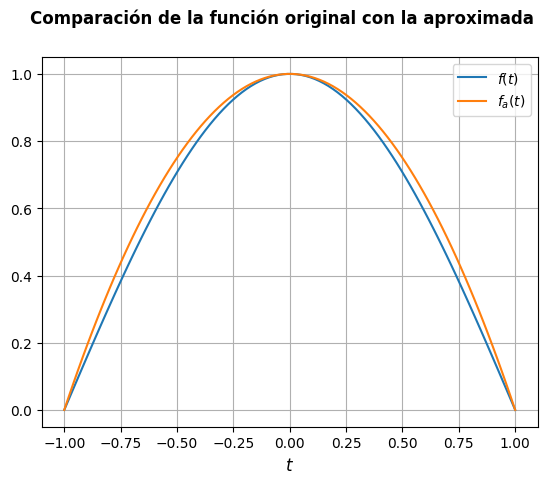

In [12]:
# Se crea la figura
fig = plt.figure()

# Se grafica el vector de la función original con respecto al vector de la variable independiente
plt.plot(t, f, label='$f(t)$')

# Se grafica el vector de la función aproximada con respecto al vector de la variable independiente
plt.plot(t, fa, label='$f_a(t)$')

# Se edita la figura
plt.xlabel('$t$', fontsize=12)  # Se escribe la etiqueta del eje de la variable independiente en tamaño de letra 12
plt.suptitle('Comparación de la función original con la aproximada', weight='bold')  # Se escribe el título de la gráfica
plt.grid()  # Se grafica la cuadrícula
plt.legend()  # Se imprime la leyenda

# Mostrar la gráfica
plt.show()